<a href="https://colab.research.google.com/github/rajaskakodkar/fish-classifier/blob/master/fish-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 1.0MB 13.6MB/s 
     |████████████████████████████████| 358kB 15.5MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 92kB 13.3MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 2.6MB 52.9MB/s 
ERROR: fastai 2.0.6 has requirement pandas>=1.1.0, but you'll have pandas 1.0.5 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fww

In [3]:
from fastbook import *
from fastai.vision.widgets import *

urls=Array.from(document.querySelectorAll("a.iusc")).reduce((acc, el) => el.hasAttribute("m") ? acc.concat(JSON.parse(el.getAttribute("m")).murl) : acc, [])
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));



In [46]:
!rm -rf /content/data

In [47]:
fish_types = 'mullet', 'red-snapper' ,'croaker'
path = Path('data')

In [48]:
if not path.exists():
    path.mkdir()
    for o in fish_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, url_file=Path(f'{o}.csv'))

In [90]:
fns = get_image_files(path)

In [91]:
fns

(#599) [Path('data/red-snapper/00000105.jpg'),Path('data/red-snapper/00000086.jpg'),Path('data/red-snapper/00000046.jpg'),Path('data/red-snapper/00000035.jpg'),Path('data/red-snapper/00000037.jpg'),Path('data/red-snapper/00000107.jpg'),Path('data/red-snapper/00000183.jpg'),Path('data/red-snapper/00000045.jpg'),Path('data/red-snapper/00000053.jpg'),Path('data/red-snapper/00000019.png')...]

In [92]:
fns[0]

Path('data/red-snapper/00000105.jpg')

In [93]:
im = Image.open(fns[0])

AttributeError: ignored

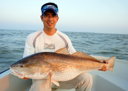

In [94]:
im.to_thumb(128,128)

In [95]:
failed = verify_images(fns)

In [96]:
failed

(#0) []

In [56]:
failed.map(Path.unlink);

In [59]:
for fn in fns:
    im = Image.open(fn)
    if im.mode != 'RGB': im.convert('RGB').save(fn)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [97]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=10),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3))

In [98]:
dls = data.dataloaders(path)

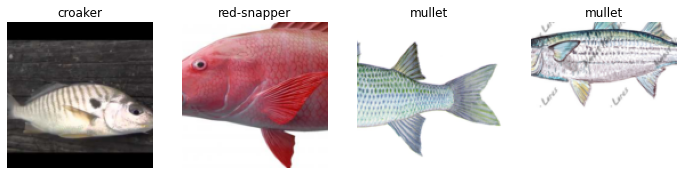

In [99]:
dls.train.show_batch(max_n=4,nrows=1)

In [100]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0030199517495930195)

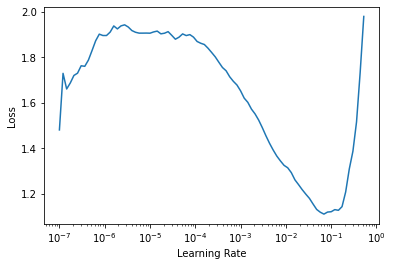

In [101]:
learn.lr_find()

In [102]:
learn.fine_tune(5)

In [45]:
learn.fine_tune(5)

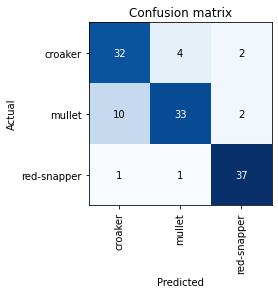

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [70]:
learn.predict('/content/gdrive/My Drive/fish.jpg')

('croaker', tensor(0), tensor([0.5462, 0.3967, 0.0570]))

In [73]:
learn.predict('/content/gdrive/My Drive/fish (2).jpg')

('mullet', tensor(1), tensor([0.1432, 0.8558, 0.0009]))

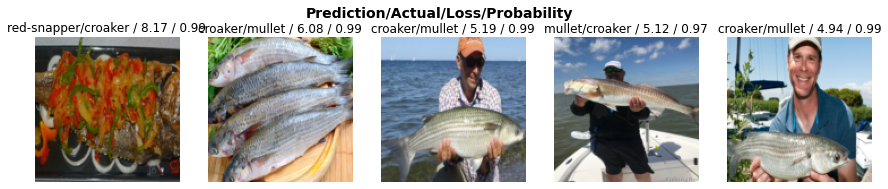

In [74]:
interp.plot_top_losses(5, nrows=1)

In [76]:
from ipywidgets import *

In [77]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [78]:
cleaner

In [82]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

